<a href="https://colab.research.google.com/github/RCaminero/artificial-lntelligence/blob/main/using_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Limpiando imagenes 

#importando librerias
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#Cargando dataset
from tensorflow.keras.datasets import  mnist 

#cargacargando nuestros datos
(X_train, y_train), (X_test, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


1


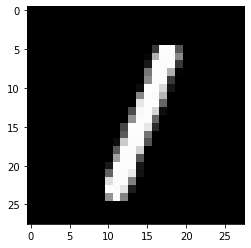

In [3]:
#visualizando datos 
X_test.shape
#X_train.shape

#seleccionar imagen al aleatorio
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap = 'gray')

#ver la imagen 
label = y_train[i]
print(label)


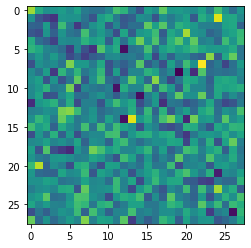

In [ ]:
#Normalizando 
X_train = X_train / 255
X_test = X_test / 255

#agregando ruido
added_noise = np.random.randn(*(28,28))

noise_factor = 0.2
added_noise = noise_factor * np.random.randn(*(28,28))

plt.imshow(added_noise)

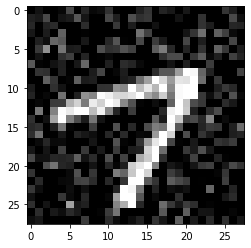

In [ ]:
#tomar imagen y agrgar ruido 
noise_factor = 0.2
sample_image = X_train[101]
noise_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

plt.imshow(noise_sample_image, cmap = 'gray')

noise_sample_image.max()
noise_sample_image.min()

#rango a trabjar que debe entre 0, 1
noise_sample_image = np.clip(noise_sample_image, 0., 1.)
noise_sample_image.max()
noise_sample_image.min()

plt.imshow(noise_sample_image, cmap = 'gray')


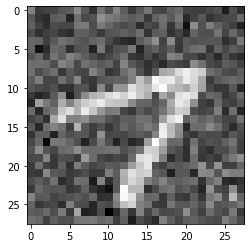

In [ ]:
#Realizando la operacion con todos las imagenes
X_train_noise = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noise = sample_image + noise_factor * np.random.randn(*(28,28))
  noise_sample_image = np.clip(noise_sample_image, 0., 1.)
  X_train_noise.append(sample_image_noise)

#convirtiendo lista en matriz
X_train_noise = np.array(X_train_noise)

#Imprimiendo
#X_train_noise.shape

plt.imshow(X_train_noise[101], cmap = 'gray')

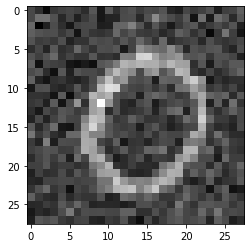

In [ ]:
#Realizando la operacion con todos las imagenes
X_test_noise = []
noise_factor = 0.2

for sample_image in X_test:
  sample_image_noise = sample_image + noise_factor * np.random.randn(*(28,28))
  noise_sample_image = np.clip(noise_sample_image, 0., 1.)
  X_test_noise.append(sample_image_noise)

#convirtiendo lista en matriz
X_test_noise = np.array(X_test_noise)

#Imprimiendo
#X_train_noise.shape

plt.imshow(X_test_noise[101], cmap = 'gray')

In [ ]:
#Creando nuestro modelo
autoencoder = tf.keras.models.Sequential()

#Armar capa convolucional
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

#Imagen codificada
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))

#Imagen decodificada
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Convolution2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Convolution2DTranspose(1,(3,3), strides=1, activation="sigmoid", padding="same"))

#compilado
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

autoencoder.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Entrenamiento de modelo
autoencoder.fit(X_train_noise.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size= 200)

Epoch 1/10
300/300 [==============================] - 50s 161ms/step - loss: 0.1951
Epoch 2/10
300/300 [==============================] - 54s 179ms/step - loss: 0.1082
Epoch 3/10
300/300 [==============================] - 50s 166ms/step - loss: 0.1009
Epoch 4/10
300/300 [==============================] - 49s 163ms/step - loss: 0.0972
Epoch 5/10
300/300 [==============================] - 47s 157ms/step - loss: 0.0947
Epoch 6/10
300/300 [==============================] - 47s 156ms/step - loss: 0.0929
Epoch 7/10
300/300 [==============================] - 47s 158ms/step - loss: 0.0917
Epoch 8/10
300/300 [==============================] - 49s 162ms/step - loss: 0.0907
Epoch 9/10
300/300 [==============================] - 48s 159ms/step - loss: 0.0900
Epoch 10/10
300/300 [==============================] - 47s 158ms/step - loss: 0.0894


1/1 [==============================] - 0s 26ms/step


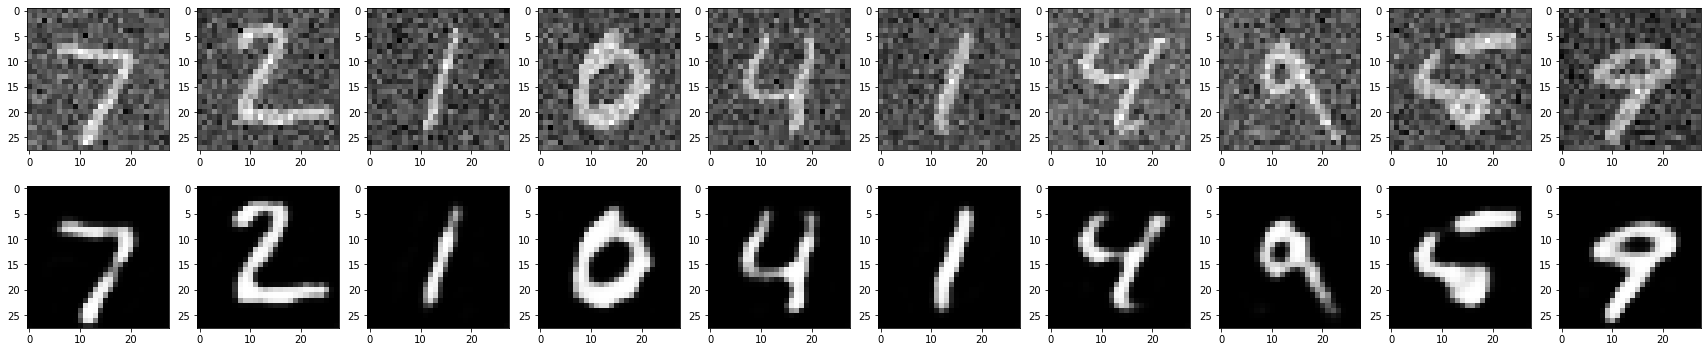

In [ ]:
#evaluando el modelo
denoised_images = autoencoder.predict(X_test_noise[:15].reshape(-1, 28, 28, 1))
denoised_images.shape

fig, axes = plt.subplots(nrows= 2, ncols=10, figsize=(30, 6))
for images, row in zip([X_test_noise[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28, 28)), cmap="gray")